In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from scipy import stats
from scipy.cluster.vq import kmeans, vq, whiten
from kneed import KneeLocator

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [3]:
df.drop(df[df['ReAdmis'] == 'No'].index, inplace = True)

In [4]:
df = df[['Age', 'Income', 'Initial_days', 'Additional_charges']]

In [5]:
df.describe()

,Age,Income,Initial_days,Additional_charges
count,3669.000000,3669.000000,3669.000000,3669.000000
mean,53.940311,40059.521352,63.859507,13051.576261
std,20.554420,28379.756647,5.078382,6542.180720
min,18.000000,300.790000,48.433580,3125.703000
25%,36.000000,19492.980000,59.697530,8090.724000
50%,54.000000,33382.220000,64.321770,11734.640000
75%,72.000000,53622.770000,68.311710,15801.150000
max,89.000000,207249.100000,71.981490,30466.930000


In [6]:
df.isna().any()

Age                   False
Income                False
Initial_days          False
Additional_charges    False
dtype: bool

In [7]:
df.head()

,Age,Income,Initial_days,Additional_charges
5000,87,47689.17,70.29151,28753.060
5001,87,100114.70,64.93704,14157.580
5005,32,58038.10,59.33979,5950.286
5006,61,11346.70,54.31234,10368.460
5008,28,18828.75,68.58989,9365.140


In [8]:
#Normalize data and store it in a new variable
scaled_data = pd.DataFrame( data = whiten(obs = df, check_finite = True), columns = df.columns)
scaled_data

,Age,Income,Initial_days,Additional_charges
0,4.233243,1.680623,13.843208,4.395626
1,4.233243,3.528161,12.788699,2.164341
2,1.557055,2.045332,11.686376,0.909650
3,2.968136,0.399871,10.696271,1.585079
4,1.362423,0.663547,13.508091,1.431696
...,...,...,...,...
3664,2.432898,0.774934,11.149896,2.655130
3665,4.233243,0.528019,13.523521,4.358032
3666,2.189609,2.323022,13.816162,2.336116
3667,2.092293,1.046745,12.477506,1.189625


In [9]:
scaled_data.dtypes

Age                   float64
Income                float64
Initial_days          float64
Additional_charges    float64
dtype: object

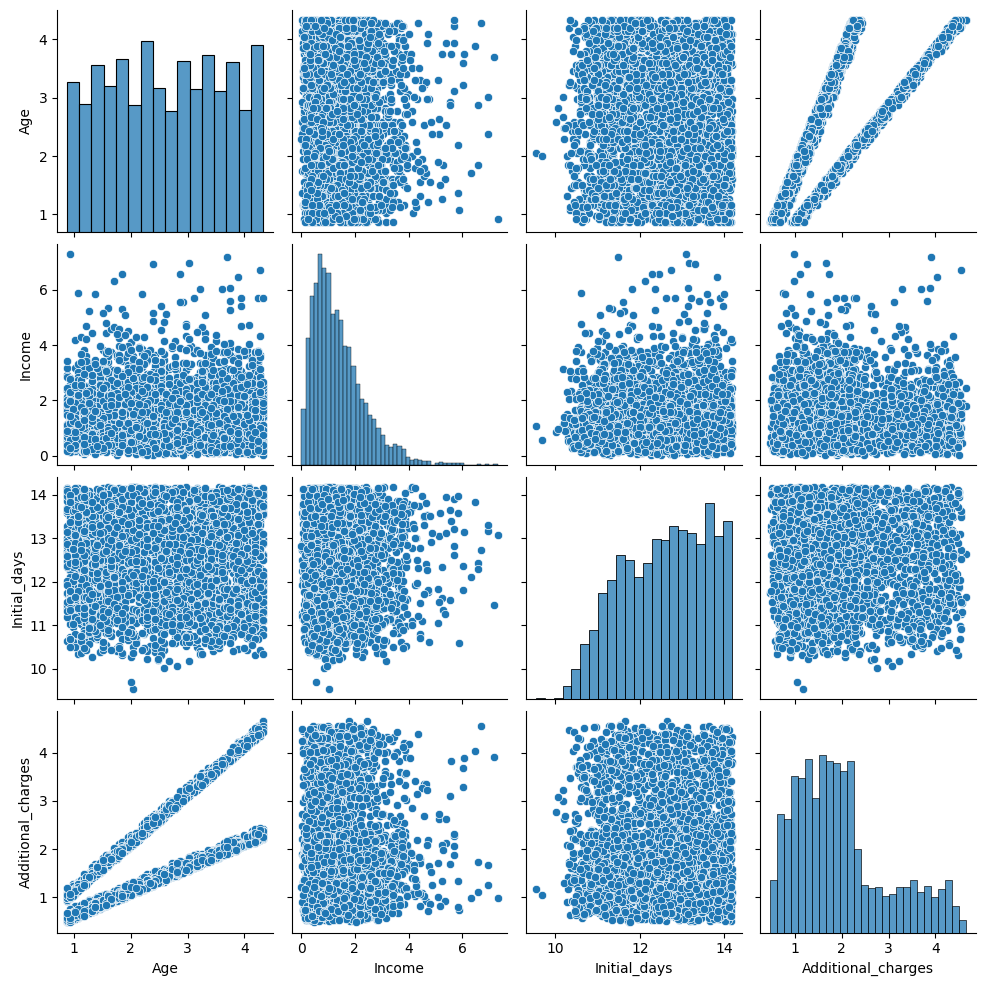

In [10]:
# Visualize potential data combinations
sns.pairplot(scaled_data)

In [11]:
#Update scaled dataframe with relevant variables
scaled_data = scaled_data[[ 'Age', 'Income', 'Initial_days']]

In [12]:
#Sanity check to make sure the standard deviation is the same, aka the data is normalized
for i in scaled_data.columns:
    print([i, scaled_data[i].std()])

['Age', 1.0001363047781153]
['Income', 1.0001363047781155]
['Initial_days', 1.0001363047781153]


In [13]:
scaled_data.describe()

,Age,Income,Initial_days
count,3669.000000,3669.000000,3669.000000
mean,2.624626,1.411745,12.576489
std,1.000136,1.000136,1.000136
min,0.875843,0.010600,9.538508
25%,1.751687,0.686956,11.756830
50%,2.627530,1.176429,12.667527
75%,3.503374,1.889730,13.453306
max,4.330559,7.303704,14.176032


In [14]:
scaled_data.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d212_data_mining_ii/scaled_data.csv')

In [15]:
#Generate cluster centers and labels with sklearn
kmeans_cc = KMeans(n_clusters = 3, n_init = 20, max_iter = 100, random_state = 22)
kmeans_cc.fit(scaled_data)
centroids = kmeans_cc.cluster_centers_
labels = kmeans_cc.labels_
print(centroids)

[[ 1.71996561  1.12055237 12.60383935]
 [ 2.82053508  3.08851051 12.38338711]
 [ 3.49447008  1.00745873 12.62956303]]


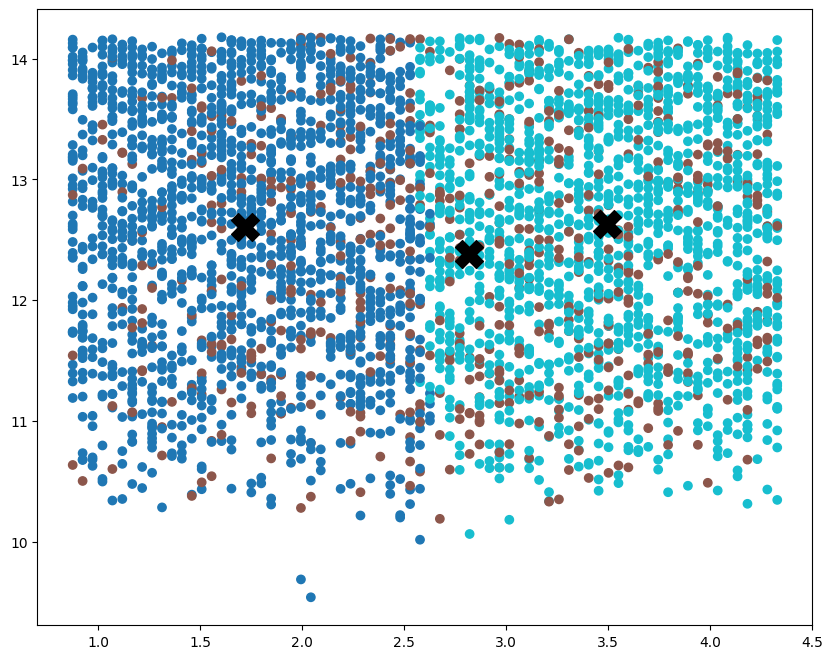

In [16]:
#Visualize data
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(x = scaled_data. iloc[:, 0], y = scaled_data. iloc[:, 2], c = kmeans_cc.labels_, cmap = 'tab10')
ax.scatter(x = kmeans_cc.cluster_centers_[:,0], y = kmeans_cc.cluster_centers_[:, 2], color = 'black', marker = 'X', s = 400 )
plt.show()


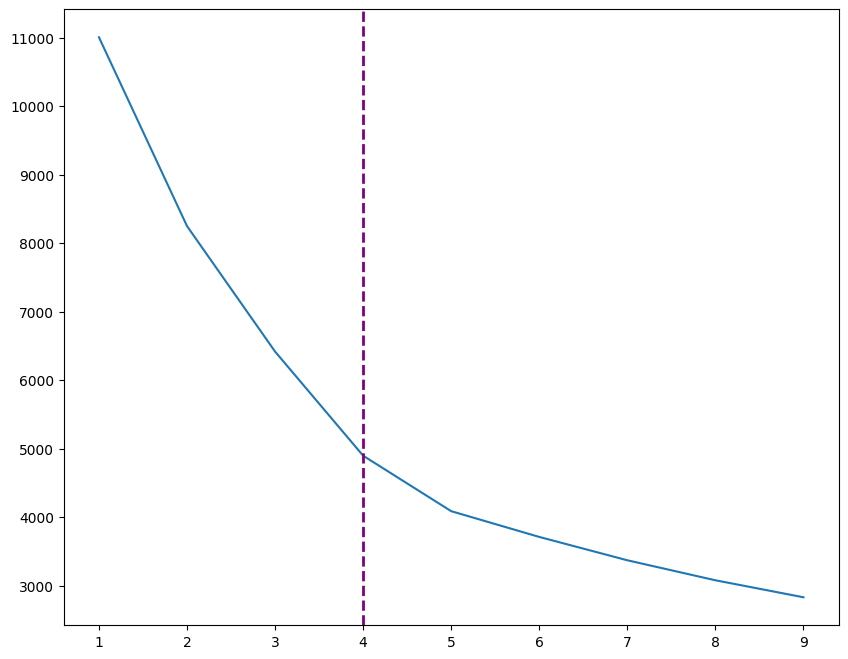

In [17]:
#Use Elbow Method and KneeLocator
squared_distance = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 22)
    kmeans.fit(scaled_data)
    squared_distance.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize = (10, 8))
knee = KneeLocator(range(1, 10), squared_distance, curve = "convex", direction = "decreasing")
plt.plot(range(1,10), squared_distance)
plt.xticks(range(1,10))
plt.axvline(x = knee.elbow, color = 'purple', ls = '--', lw = 2,)

In [18]:
#Regenerate cluster centers and labels with sklearn
kmeans_cc2 = KMeans(n_clusters = 4, n_init = 20, max_iter = 100, random_state = 22)
kmeans_cc2.fit(scaled_data)
centroids = kmeans_cc.cluster_centers_
labels = kmeans_cc.labels_

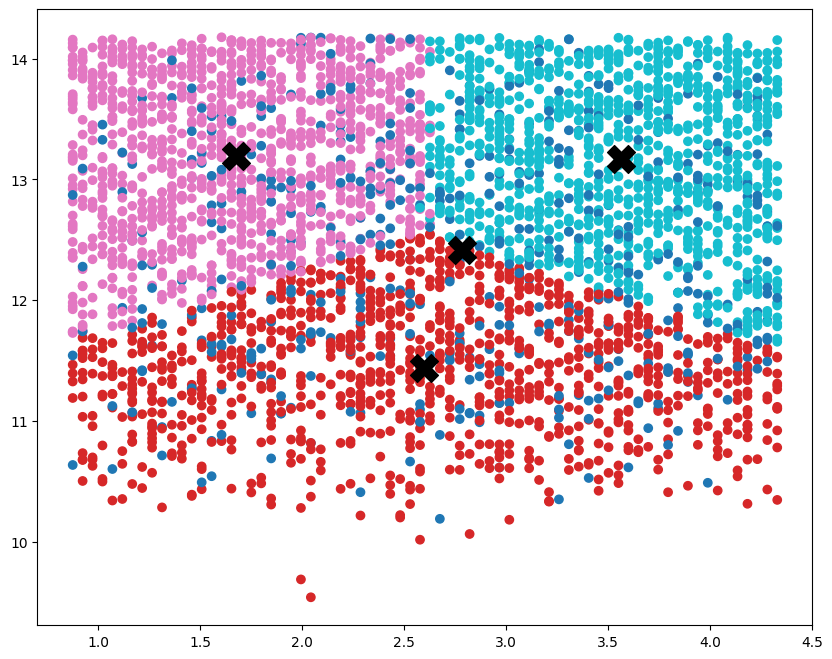

In [19]:
#Update visualize data
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(x = scaled_data. iloc[:, 0], y = scaled_data. iloc[:, 2], c = kmeans_cc2.labels_, cmap = 'tab10')
ax.scatter(x = kmeans_cc2.cluster_centers_[:,0], y = kmeans_cc2.cluster_centers_[:, 2], color = 'black', marker = 'X', s = 400 )
plt.show()